In [1]:
# Import libraries
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns

#### Lyrics cleaned with english stop words

In [60]:
########## ANN LYRICS ENGLISH STOP WORDS ##########
# Import data and split into training and testing
lyrics1 = pd.read_csv("paul_john_lyrics_corpus_count100.csv") # (141, 101)

train_lyrics1, test_lyrics1 = train_test_split(lyrics1, test_size = 0.3, random_state = 42)

x_train_lyrics1 = train_lyrics1.loc[:, lyrics1.columns != "LABEL"].to_numpy() # (98, 100)
x_test_lyrics1 = test_lyrics1.loc[:, lyrics1.columns != "LABEL"].to_numpy() # (43, 300)
y_train_lyrics1 = train_lyrics1.loc[:, lyrics1.columns == "LABEL"].to_numpy() # (98, 1)
y_test_lyrics1 = test_lyrics1.loc[:, lyrics1.columns == "LABEL"].to_numpy() # (43, 1)

In [61]:
# What does the data look like?
print("The first value of x_train_lyrics1 is: \n", x_train_lyrics1[0])
print("The shape of x_train is: ", x_train_lyrics1.shape, "\n")

print("The first value of y_train_lyrics1 is: ", y_train_lyrics1[0])
print("The shape of y_train is: ", y_train_lyrics1.shape, "\n")

print("The first value of x_test_lyrics1 is: \n", x_test_lyrics1[0])
print("The shape of x_test is: ", x_test_lyrics1.shape, "\n")

print("The first value of y_test_lyrics1 is: ", y_test_lyrics1[0])
print("The shape of y_test is: ", y_test_lyrics1.shape, "\n")

# We need to one-hot-encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot_lyrics1 = encoder.fit_transform(y_train_lyrics1)
y_test_one_hot_lyrics1 = encoder.fit_transform(y_test_lyrics1)

# Need to change datatypes so they are compataible for keras later
x_train = np.array(x_train_lyrics1, dtype=np.float32) 
y_train = np.array(y_train_one_hot_lyrics1, dtype=np.float32) 
x_test = np.array(x_test_lyrics1, dtype=np.float32)
y_test = np.array(y_test_one_hot_lyrics1, dtype=np.float32)

The first value of x_train_lyrics1 is: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 5 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The shape of x_train is:  (98, 100) 

The first value of y_train_lyrics1 is:  ['Lennon']
The shape of y_train is:  (98, 1) 

The first value of x_test_lyrics1 is: 
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  2  0  0  0  0  3  0  0  0  0  0  0  0  0  0
 48  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0
  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0]
The shape of x_test is:  (43, 100) 

The first value of y_test_lyrics1 is:  ['Lennon']
The shape of y_test is:  (43, 1) 



Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_33 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,062 (8.05 KB)

 Trainable params: 2,062 (8.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5281 - loss: 2.1135 - val_accuracy: 0.3953 - val_loss: 2.0233
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5308 - loss: 1.6823 - val_accuracy: 0.3953 - val_loss: 1.9044
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6179 - loss: 1.2082 - val_accuracy: 0.3953 - val_loss: 1.8171
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4691 - loss: 1.3833 - val_accuracy: 0.4186 - val_loss: 1.7482
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5133 - loss: 1.4010 - val_accuracy: 0.3953 - val_loss: 1.6989
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5215 - loss: 1.0929 - val_accuracy: 0.3953 - val_loss: 1.6553
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5560 - loss: 1.2666 - val_accuracy: 0.3721 - val_loss: 1.6068
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6363 - loss: 1.1311 - val_accuracy: 0.4651 - val_loss: 1.5646


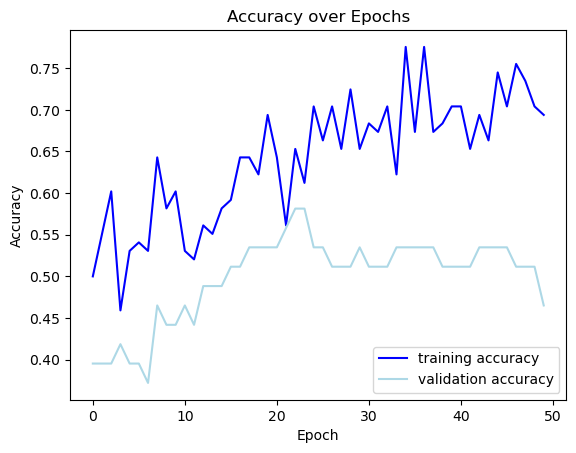

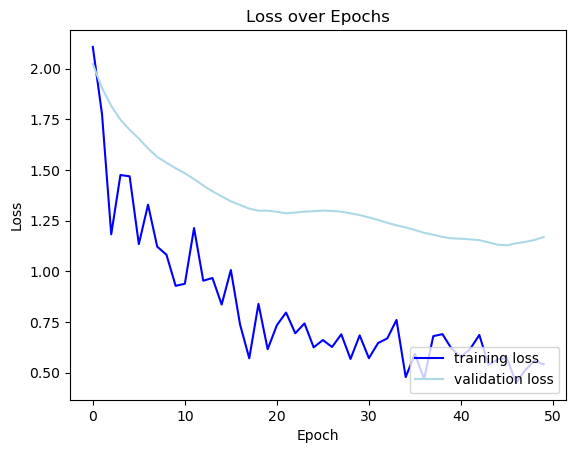

In [41]:
##########################################################
# Create sequential ANN. 
# BUILD MODEL
ANN = keras.Sequential([tf.keras.layers.Input(shape=(100, )),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(20, activation='relu'),
                        tf.keras.layers.Dense(2, activation='softmax')])

# MODEL SUMMARY
ANN.summary()

# COMPILE MODEL
ANN.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
            optimizer='adam')

# FIT THE MODEL TO TRAINING DATA
Fit = ANN.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4663 - loss: 1.1565
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


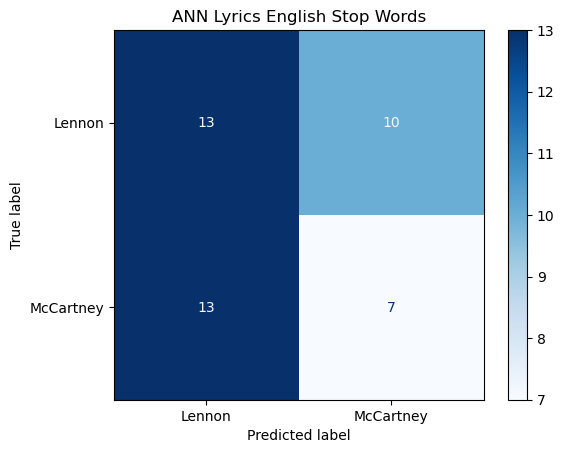

In [42]:
# TEST
Test_Loss, Test_Accuracy = ANN.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = ANN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("ANN Lyrics English Stop Words")
plt.show()

C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,927 (15.34 KB)

 Trainable params: 3,927 (15.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.5053 - loss: 0.7740 - val_accuracy: 0.5814 - val_loss: 0.7327
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6116 - loss: 0.7359 - val_accuracy: 0.5349 - val_loss: 0.7120
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4286 - loss: 0.8017 - val_accuracy: 0.5581 - val_loss: 0.6999
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5311 - loss: 0.7242 - val_accuracy: 0.5581 - val_loss: 0.6950
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5898 - loss: 0.6977 - val_accuracy: 0.5814 - val_loss: 0.6907
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5971 - loss: 0.7193 - val_accuracy: 0.6047 - val_loss: 0.6860
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5929 - loss: 0.6612 - val_accuracy: 0.6047 - val_loss: 0.6813
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6250 - loss: 0.6937 - val_accuracy: 0.6047 - val_loss: 0.6799

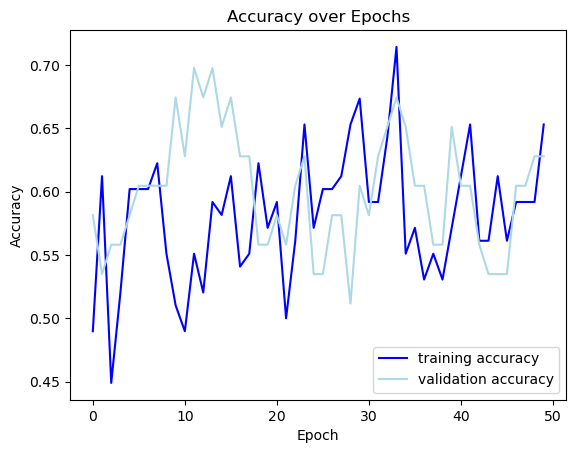

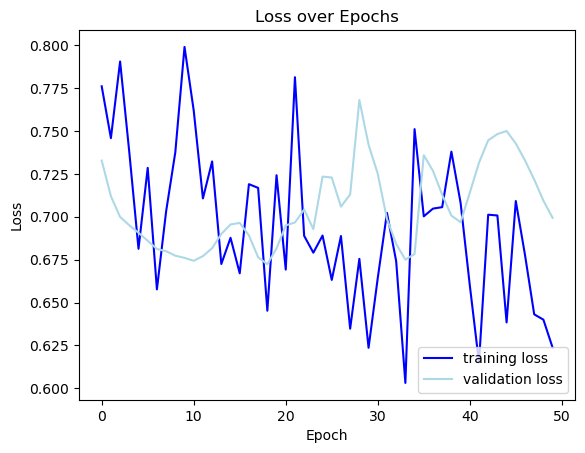

In [36]:
########## RNN LYRICS ENGLISH STOP WORDS ##########
##########################################################
# Create sequential RNN
# BUILD MODEL
RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

RNN.summary()

RNN.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = RNN.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.6165 - loss: 0.7083  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


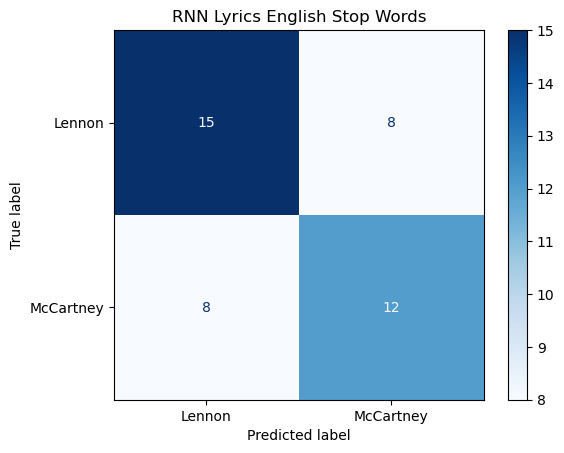

In [37]:
# TEST
Test_Loss, Test_Accuracy = RNN.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = RNN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("RNN Lyrics English Stop Words")
plt.show()

C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,727 (45.81 KB)

 Trainable params: 11,727 (45.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.4153 - loss: 0.7085 - val_accuracy: 0.4884 - val_loss: 0.6931
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4689 - loss: 0.7010 - val_accuracy: 0.3953 - val_loss: 0.6946
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4898 - loss: 0.6904 - val_accuracy: 0.4186 - val_loss: 0.6953
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5465 - loss: 0.6895 - val_accuracy: 0.3953 - val_loss: 0.6954
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4411 - loss: 0.6982 - val_accuracy: 0.4419 - val_loss: 0.6959
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4905 - loss: 0.6923 - val_accuracy: 0.4884 - val_loss: 0.6973
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4480 - loss: 0.7038 - val_accuracy: 0.4651 - val_loss: 0.6989
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4918 - loss: 0.6885 - val_accuracy: 0.4186 - val_loss: 0.7009

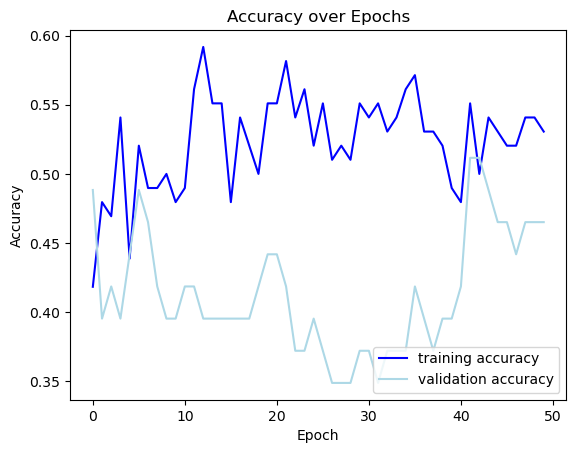

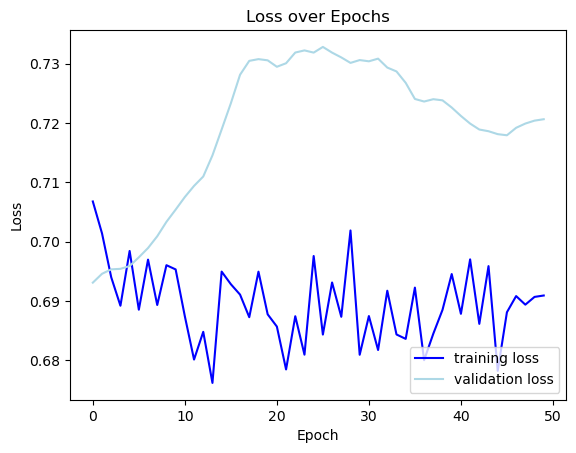

In [66]:
########## LSTM LYRICS ENGLISH STOP WORDS ##########
##########################################################
# Create sequential LSTM
# BUILD MODEL
LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

LSTM.summary()

LSTM.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = LSTM.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4663 - loss: 0.7215
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


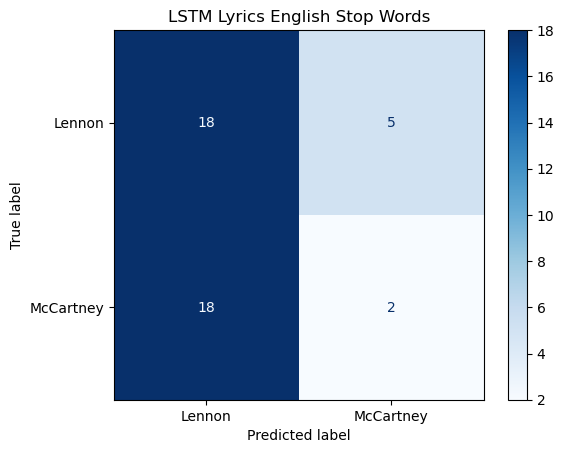

In [67]:
# TEST
Test_Loss, Test_Accuracy = LSTM.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = LSTM.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("LSTM Lyrics English Stop Words")
plt.show()

#### Lyrics cleaned with lemmer

In [68]:
# Import data and split into training and testing
lyrics2 = pd.read_csv("paul_john_lyrics_corpus_lem_count100.csv") # (141, 101)

train_lyrics2, test_lyrics2 = train_test_split(lyrics2, test_size = 0.3, random_state = 42)

x_train_lyrics2 = train_lyrics2.loc[:, lyrics2.columns != "Label"].to_numpy() # (98, 100)
x_test_lyrics2 = test_lyrics2.loc[:, lyrics2.columns != "Label"].to_numpy() # (43, 300)
y_train_lyrics2 = train_lyrics2.loc[:, lyrics2.columns == "Label"].to_numpy() # (98, 1)
y_test_lyrics2 = test_lyrics2.loc[:, lyrics2.columns == "Label"].to_numpy() # (43, 1)

In [69]:
# What does the data look like?
print("The first value of x_train_lyrics2 is: \n", x_train_lyrics2[0])
print("The shape of x_train_lyrics2 is: ", x_train_lyrics2.shape, "\n")

print("The first value of y_train_lyrics2 is: ", y_train_lyrics2[0])
print("The shape of y_train_lyrics2 is: ", y_train_lyrics2.shape, "\n")

print("The first value of x_test_lyrics2 is: \n", x_test_lyrics2[0])
print("The shape of x_test_lyrics2 is: ", x_test_lyrics2.shape, "\n")

print("The first value of y_test_lyrics2 is: ", y_test_lyrics2[0])
print("The shape of y_test_lyrics2 is: ", y_test_lyrics2.shape, "\n")

# We need to one-hot-encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot_lyrics2 = encoder.fit_transform(y_train_lyrics2)
y_test_one_hot_lyrics2 = encoder.fit_transform(y_test_lyrics2)

# Need to change datatypes so they are compataible for keras later
x_train = np.array(x_train_lyrics2, dtype=np.float32) 
y_train = np.array(y_train_one_hot_lyrics2, dtype=np.float32) 
x_test = np.array(x_test_lyrics2, dtype=np.float32)
y_test = np.array(y_test_one_hot_lyrics2, dtype=np.float32)

The first value of x_train_lyrics2 is: 
 [5 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 9 0 1 2
 1 1 0 0 0 0 0 0 5 0 0 0 5 1 2 0 0 0 0 0 0 0 7 0 0 0 1 0 0 0 0 0 2 0 0 5 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0]
The shape of x_train_lyrics2 is:  (98, 100) 

The first value of y_train_lyrics2 is:  ['Lennon']
The shape of y_train_lyrics2 is:  (98, 1) 

The first value of x_test_lyrics2 is: 
 [ 0  0  3  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  2  0  0  0  1  0
  2  0  0  0  0  0  0  0  0  0  0  0  0  3  0 48  3  0  0  0  0  0  0  0
  0  1  0 33  0  0  0  0  0  0  0  0  3  2  0  0  0  0  0  7  0  0  0  0
  0  0  0  0  3  9  0  0  0  0  1 10  0  0  0  0  0  0  1  0  0  0  0  1
  1  0 53  0]
The shape of x_test_lyrics2 is:  (43, 100) 

The first value of y_test_lyrics2 is:  ['Lennon']
The shape of y_test_lyrics2 is:  (43, 1) 



Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_42 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,062 (8.05 KB)

 Trainable params: 2,062 (8.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4721 - loss: 1.9169 - val_accuracy: 0.6047 - val_loss: 1.5795
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4523 - loss: 2.5948 - val_accuracy: 0.5581 - val_loss: 1.4953
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4908 - loss: 2.1932 - val_accuracy: 0.5349 - val_loss: 1.4101
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4752 - loss: 2.3733 - val_accuracy: 0.5581 - val_loss: 1.3381
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5103 - loss: 1.9416 - val_accuracy: 0.5581 - val_loss: 1.2985
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4853 - loss: 2.4690 - val_accuracy: 0.5581 - val_loss: 1.2468
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5644 - loss: 1.8251 - val_accuracy: 0.5814 - val_loss: 1.1954
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5279 - loss: 1.5032 - val_accuracy: 0.5814 - val_loss: 1.1510


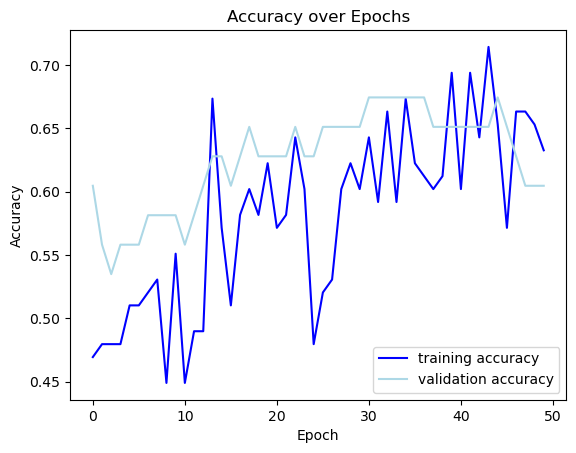

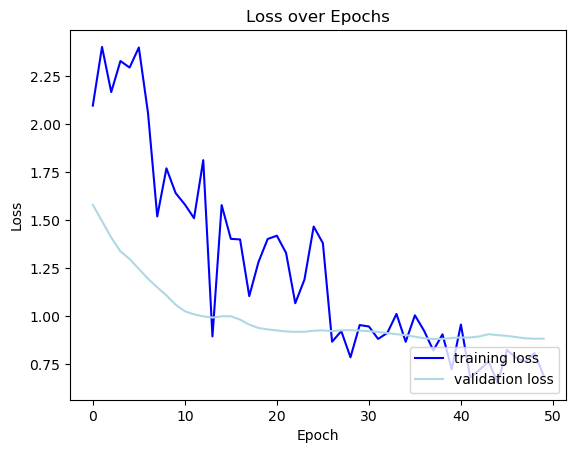

In [51]:
########## ANN LYRICS LEMMER ##########
##########################################################
# Create sequential ANN. 
# BUILD MODEL
ANN = keras.Sequential([tf.keras.layers.Input(shape=(100, )),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(20, activation='relu'),
                        tf.keras.layers.Dense(2, activation='softmax')])

# MODEL SUMMARY
ANN.summary()

# COMPILE MODEL
ANN.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
            optimizer='adam')

# FIT THE MODEL TO TRAINING DATA
Fit = ANN.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6114 - loss: 0.8383
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


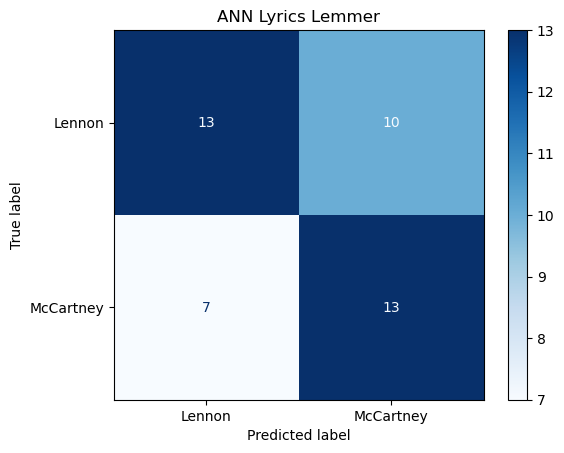

In [52]:
# TEST
Test_Loss, Test_Accuracy = ANN.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = ANN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("ANN Lyrics Lemmer")
plt.show()

C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)       │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,927 (15.34 KB)

 Trainable params: 3,927 (15.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.5028 - loss: 0.8724 - val_accuracy: 0.4651 - val_loss: 0.7396
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4450 - loss: 0.9542 - val_accuracy: 0.4884 - val_loss: 0.7259
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5612 - loss: 0.7839 - val_accuracy: 0.4651 - val_loss: 0.7160
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5859 - loss: 0.7608 - val_accuracy: 0.4651 - val_loss: 0.7081
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4597 - loss: 0.8804 - val_accuracy: 0.6047 - val_loss: 0.6839
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5281 - loss: 0.8298 - val_accuracy: 0.5116 - val_loss: 0.6726
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6024 - loss: 0.7068 - val_accuracy: 0.4884 - val_loss: 0.6793
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5497 - loss: 0.8219 - val_accuracy: 0.4884 - val_loss: 0.6978

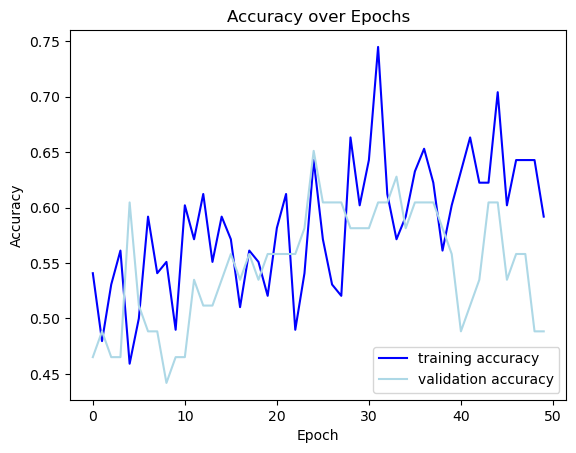

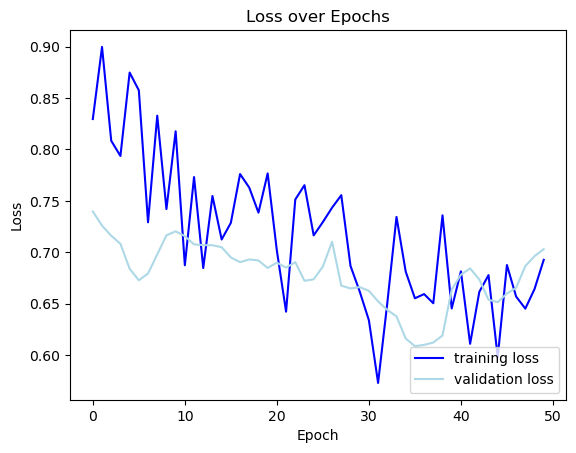

In [70]:
########## RNN LYRICS LEMMER ##########
##########################################################
# Create sequential RNN
# BUILD MODEL
RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

RNN.summary()

RNN.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = RNN.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5027 - loss: 0.6848
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


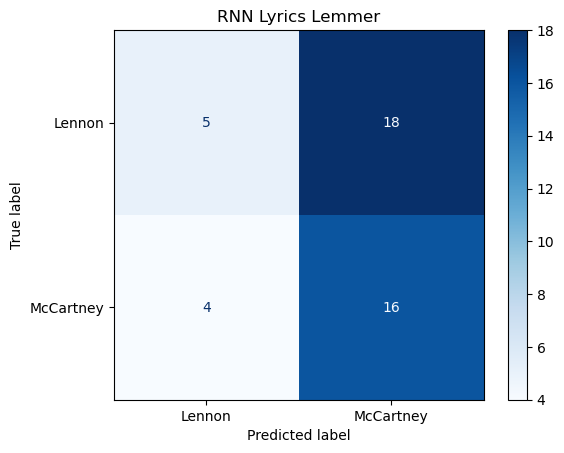

In [71]:
# TEST
Test_Loss, Test_Accuracy = RNN.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = RNN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("RNN Lyrics Lemmer")
plt.show()

C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,727 (45.81 KB)

 Trainable params: 11,727 (45.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.4909 - loss: 0.8042 - val_accuracy: 0.3953 - val_loss: 0.7530
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4440 - loss: 0.7280 - val_accuracy: 0.3953 - val_loss: 0.7272
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4935 - loss: 0.7042 - val_accuracy: 0.3721 - val_loss: 0.7216
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4142 - loss: 0.7761 - val_accuracy: 0.3721 - val_loss: 0.7181
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5908 - loss: 0.6588 - val_accuracy: 0.3721 - val_loss: 0.7121
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4443 - loss: 0.7569 - val_accuracy: 0.3721 - val_loss: 0.7068
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4557 - loss: 0.7290 - val_accuracy: 0.3953 - val_loss: 0.7086
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3717 - loss: 0.7619 - val_accuracy: 0.3721 - val_loss: 0.7117

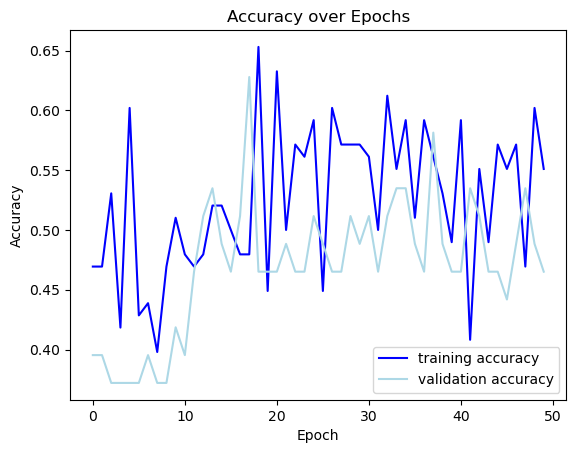

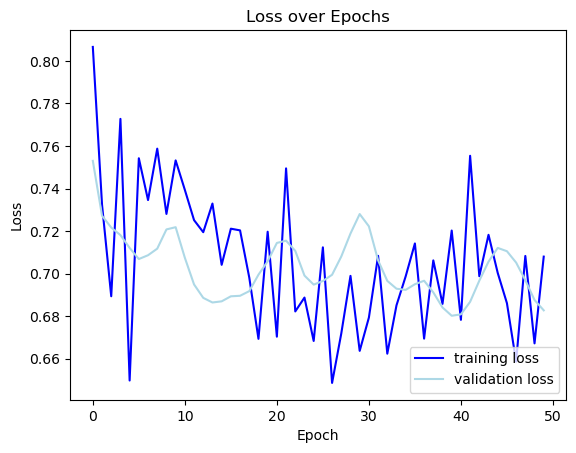

In [72]:
########## LSTM LYRICS ENGLISH STOP WORDS ##########
##########################################################
# Create sequential LSTM
# BUILD MODEL
LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

LSTM.summary()

LSTM.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = LSTM.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4663 - loss: 0.6836
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


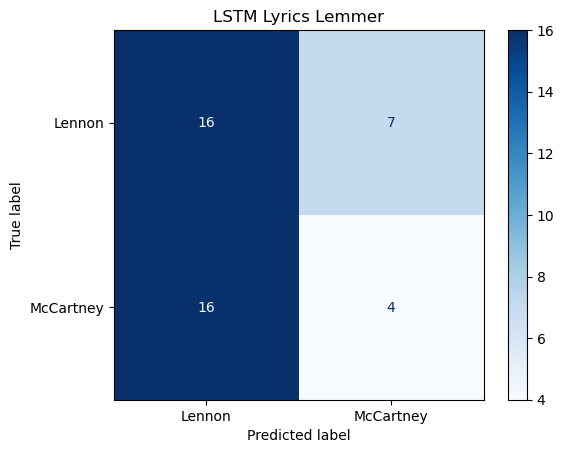

In [73]:
# TEST
Test_Loss, Test_Accuracy = LSTM.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = LSTM.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("LSTM Lyrics Lemmer")
plt.show()

#### Lyrics cleaned using stemmer

In [74]:
########## ANN LYRICS STEMMER ##########
# Import data and split into training and testing
lyrics3 = pd.read_csv("paul_john_lyrics_corpus_stem_count100.csv") # (141, 101)

train_lyrics3, test_lyrics3 = train_test_split(lyrics3, test_size = 0.3, random_state = 42)

x_train_lyrics3 = train_lyrics3.loc[:, lyrics3.columns != "Label"].to_numpy() # (98, 100)
x_test_lyrics3 = test_lyrics3.loc[:, lyrics3.columns != "Label"].to_numpy() # (43, 300)
y_train_lyrics3 = train_lyrics3.loc[:, lyrics3.columns == "Label"].to_numpy() # (98, 1)
y_test_lyrics3 = test_lyrics3.loc[:, lyrics3.columns == "Label"].to_numpy() # (43, 1)

In [75]:
# What does the data look like?
print("The first value of x_train_lyrics3 is: \n", x_train_lyrics3[0])
print("The shape of x_train_lyrics3 is: ", x_train_lyrics3.shape, "\n")

print("The first value of y_train_lyrics3 is: ", y_train_lyrics3[0])
print("The shape of y_train_lyrics3 is: ", y_train_lyrics3.shape, "\n")

print("The first value of x_test_lyrics3 is: \n", x_test_lyrics3[0])
print("The shape of x_test_lyrics3 is: ", x_test_lyrics3.shape, "\n")

print("The first value of y_test_lyrics3 is: ", y_test_lyrics3[0])
print("The shape of y_test_lyrics3 is: ", y_test_lyrics3.shape, "\n")

# We need to one-hot-encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot_lyrics3 = encoder.fit_transform(y_train_lyrics3)
y_test_one_hot_lyrics3 = encoder.fit_transform(y_test_lyrics3)

# Need to change datatypes so they are compataible for keras later
x_train = np.array(x_train_lyrics3, dtype=np.float32) 
y_train = np.array(y_train_one_hot_lyrics3, dtype=np.float32) 
x_test = np.array(x_test_lyrics3, dtype=np.float32)
y_test = np.array(y_test_one_hot_lyrics3, dtype=np.float32)

The first value of x_train_lyrics3 is: 
 [5 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 9 0 1 2
 1 1 0 0 0 0 0 0 0 5 0 0 0 5 2 0 0 0 0 0 0 0 7 0 0 0 1 0 0 0 0 0 2 0 0 5 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0]
The shape of x_train_lyrics3 is:  (98, 100) 

The first value of y_train_lyrics3 is:  ['Lennon']
The shape of y_train_lyrics3 is:  (98, 1) 

The first value of x_test_lyrics3 is: 
 [ 0  0  3  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  2  0  0  0  1  0
  2  0  0  0  0  0  0  0  0  0  0  0  0  3  0 48  3  0  0  0  0 11  0  0
  0  0  1 33  0  0  0  0  0  0  0  0  3  2  0  0  0  0  0  7  0  0  0  0
  0  0  0  0  3  9  0  0  0  0  1 10  0  0  0  0  0  0  1  0  0  0  0  1
  0  1 53  0]
The shape of x_test_lyrics3 is:  (43, 100) 

The first value of y_test_lyrics3 is:  ['Lennon']
The shape of y_test_lyrics3 is:  (43, 1) 



Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_59 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,062 (8.05 KB)

 Trainable params: 2,062 (8.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5206 - loss: 2.8662 - val_accuracy: 0.5116 - val_loss: 1.9176
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5683 - loss: 3.3420 - val_accuracy: 0.5349 - val_loss: 1.8613
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5704 - loss: 2.1108 - val_accuracy: 0.5349 - val_loss: 1.8222
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4492 - loss: 2.5630 - val_accuracy: 0.5581 - val_loss: 1.7779
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4842 - loss: 2.3703 - val_accuracy: 0.5581 - val_loss: 1.7178
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5744 - loss: 2.1383 - val_accuracy: 0.5349 - val_loss: 1.6739
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4502 - loss: 2.7707 - val_accuracy: 0.5116 - val_loss: 1.6373
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5090 - loss: 2.3263 - val_accuracy: 0.5116 - val_loss: 1.6021


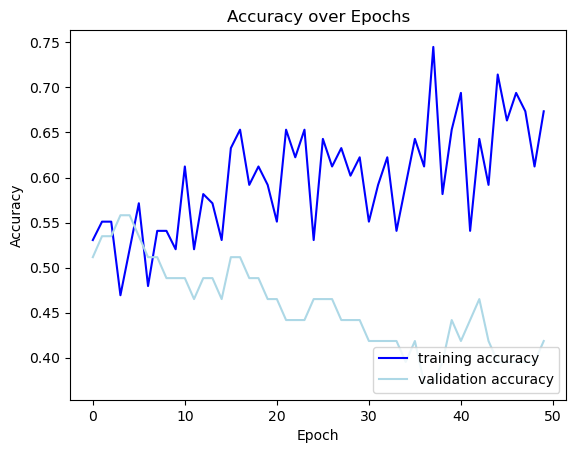

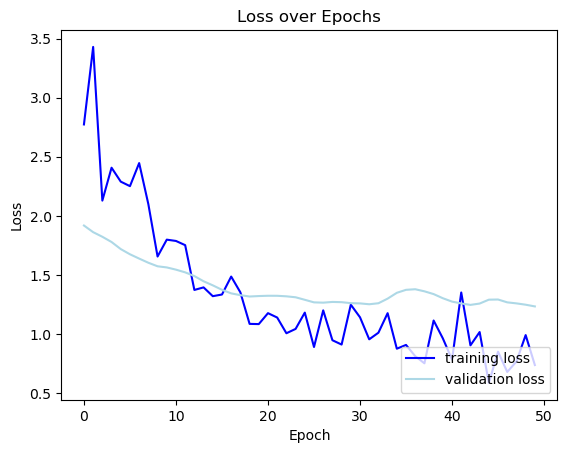

In [76]:
########## ANN LYRICS LEMMER ##########
##########################################################
# Create sequential ANN. 
# BUILD MODEL
ANN = keras.Sequential([tf.keras.layers.Input(shape=(100, )),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(20, activation='relu'),
                        tf.keras.layers.Dense(2, activation='softmax')])

# MODEL SUMMARY
ANN.summary()

# COMPILE MODEL
ANN.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
            optimizer='adam')

# FIT THE MODEL TO TRAINING DATA
Fit = ANN.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4145 - loss: 1.2478
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


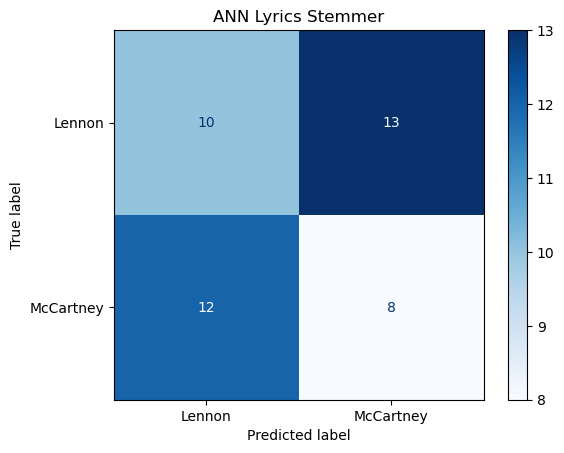

In [77]:

# TEST
Test_Loss, Test_Accuracy = ANN.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = ANN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("ANN Lyrics Stemmer")
plt.show()

C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_13 (SimpleRNN)       │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,927 (15.34 KB)

 Trainable params: 3,927 (15.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.4411 - loss: 0.8515 - val_accuracy: 0.5581 - val_loss: 0.7217
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4782 - loss: 0.8066 - val_accuracy: 0.4186 - val_loss: 0.7324
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5693 - loss: 0.7131 - val_accuracy: 0.3953 - val_loss: 0.7516
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5445 - loss: 0.7673 - val_accuracy: 0.4186 - val_loss: 0.7572
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5278 - loss: 0.8238 - val_accuracy: 0.4651 - val_loss: 0.7494
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5497 - loss: 0.7803 - val_accuracy: 0.4651 - val_loss: 0.7492
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5891 - loss: 0.6878 - val_accuracy: 0.5116 - val_loss: 0.7277
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5271 - loss: 0.8165 - val_accuracy: 0.5814 - val_loss: 0.7027

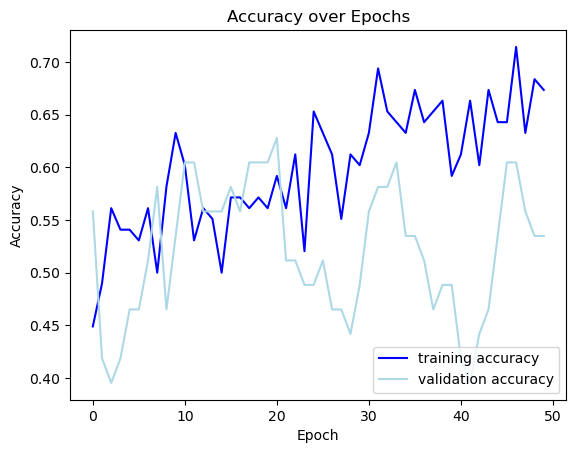

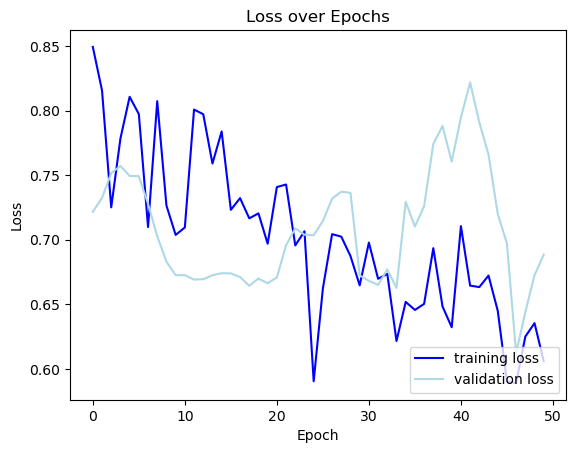

In [82]:
########## RNN LYRICS LEMMER ##########
##########################################################
# Create sequential RNN
# BUILD MODEL
RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

RNN.summary()

RNN.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = RNN.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5441 - loss: 0.6616
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


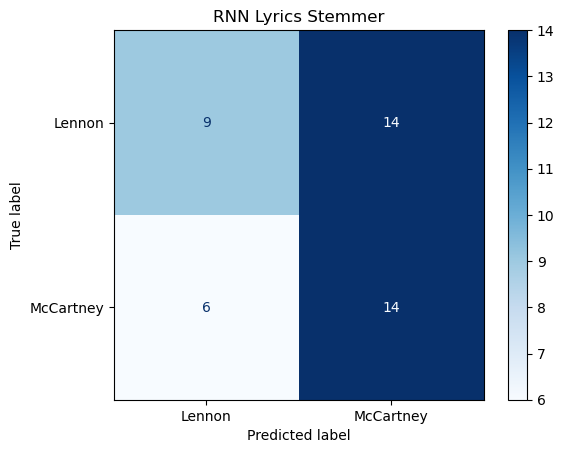

In [83]:
# TEST
Test_Loss, Test_Accuracy = RNN.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = RNN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("RNN Lyrics Stemmer")
plt.show()

C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,952 (179.50 KB)

 Trainable params: 45,952 (179.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.4753 - loss: 0.7369 - val_accuracy: 0.4651 - val_loss: 0.7034
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5050 - loss: 0.6955 - val_accuracy: 0.4651 - val_loss: 0.7071
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4648 - loss: 0.7237 - val_accuracy: 0.4651 - val_loss: 0.7020
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5557 - loss: 0.7066 - val_accuracy: 0.4651 - val_loss: 0.7089
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4545 - loss: 0.7177 - val_accuracy: 0.5349 - val_loss: 0.6930
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5102 - loss: 0.7212 - val_accuracy: 0.5581 - val_loss: 0.6897
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5879 - loss: 0.6889 - val_accuracy: 0.5814 - val_loss: 0.6893
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5352 - loss: 0.6925 - val_accuracy: 0.5116 - val_loss: 0.694

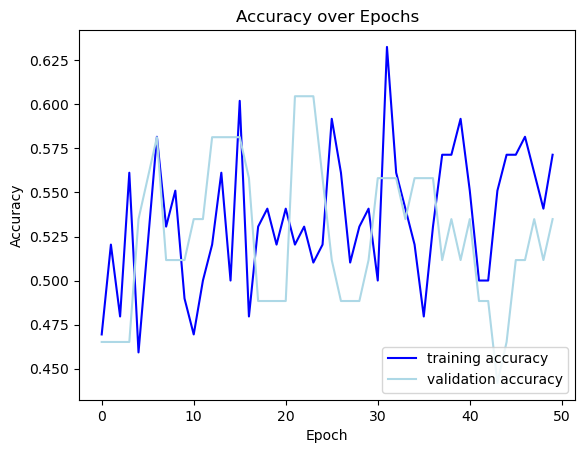

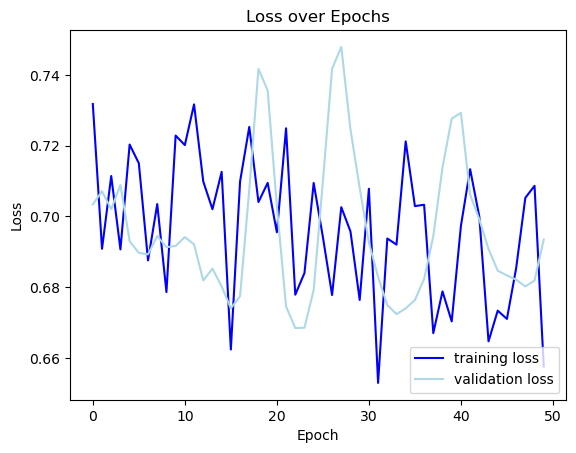

In [80]:
########## LSTM LYRICS ENGLISH STOP WORDS ##########
##########################################################
# Create sequential LSTM
# BUILD MODEL
LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 100, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

LSTM.summary()

LSTM.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = LSTM.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5337 - loss: 0.6889
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


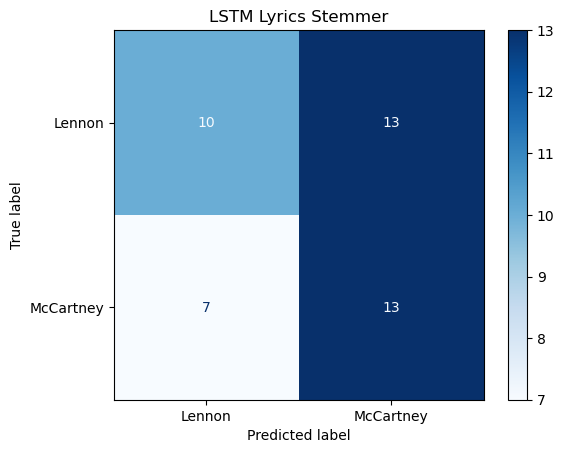

In [81]:
# TEST
Test_Loss, Test_Accuracy = LSTM.evaluate(x_test, y_test)

# PREDICT & CONFUSION MATRIX
predictions = LSTM.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("LSTM Lyrics Stemmer")
plt.show()